In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

A. Data Manipulation:

In [7]:
# ● Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [8]:
#● Extract the 15th column and store it in ‘customer_15’
customer_15 = df.loc[:,['StreamingMovies']]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [9]:
# ● Extract all the male senior citizens whose payment method is electronic
#   check and store the result in ‘senior_male_electronic’

df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [13]:
#Ans
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [14]:
#● Extract all those customers whose tenure is greater than 70 months or
#  their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

customer_total_tenure = df[(df['tenure'] >70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [15]:
#● Extract all the customers whose contract is of two years, payment method
#  is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn']== 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [16]:
#● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333 = df.sample(333)

In [17]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4457,7611-YKYTC,Male,0,Yes,Yes,22,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.00,1573.95,No
3595,2260-USTRB,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.20,115.95,Yes
4519,0103-CSITQ,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.40,6252.7,No
1529,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
5285,9479-HYNYL,Female,0,Yes,No,71,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),80.70,5705.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,6253-WRFHY,Male,0,Yes,Yes,13,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,No
3246,8806-EAGWC,Male,0,No,No,3,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.15,159.15,Yes
2338,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
4733,1319-YLZJG,Male,0,Yes,No,12,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.9,No


In [18]:
#● Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

2. Data Visualization:

● Build a bar-plot for the ’InternetService’ column:
a. Set x-axis label to ‘Categories of Internet Service’
b. Set y-axis label to ‘Count of Categories’
c. Set the title of plot to be ‘Distribution of Internet Service’
d. Set the color of the bars to be ‘orange

In [19]:
import matplotlib.pyplot as plt 
import seaborn as  sns

In [20]:
x= df['InternetService'].value_counts().keys().tolist()
x

['Fiber optic', 'DSL', 'No']

In [21]:
y = df['InternetService'].value_counts().tolist()
y

[3096, 2421, 1526]

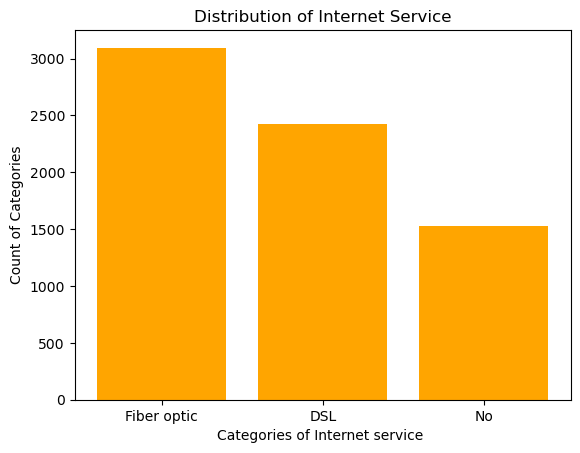

In [22]:
plt.bar(x,y,color ='orange')
plt.xlabel("Categories of Internet service ")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

● Build a histogram for the ‘tenure’ column:
a. Set the number of bins to be 30
b. Set the color of the bins to be ‘green’
c. Assign the title ‘Distribution of Tenure'


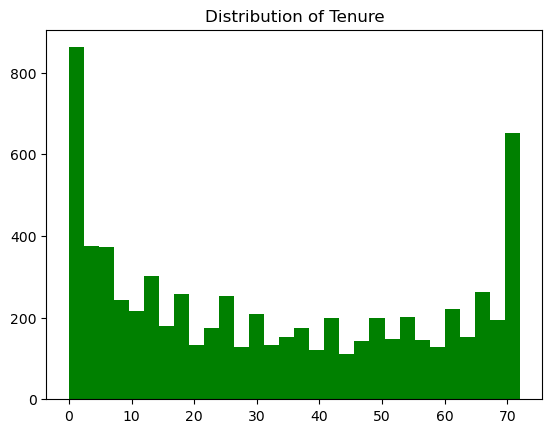

In [23]:
plt.hist(df['tenure'],color='green',bins=30)
plt.title("Distribution of Tenure")
plt.show()

● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a. Assign the points a color of ‘brown’
b. Set the x-axis label to ‘Tenure of customer’
c. Set the y-axis label to ‘Monthly Charges of customer’
d. Set the title to ‘Tenure vs Monthly Charges’
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &
f. ‘Contract’ on the x-axis.


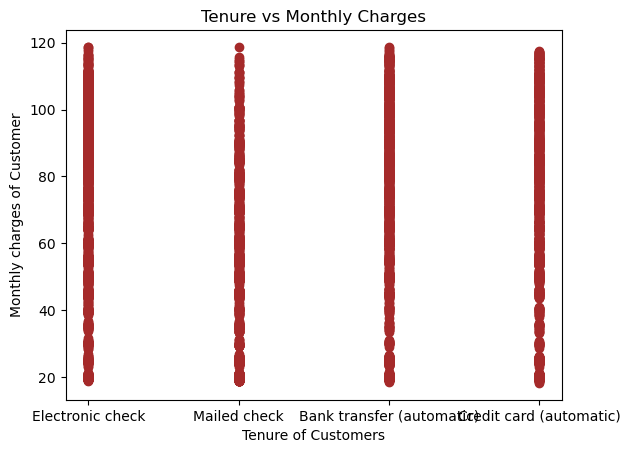

In [24]:
plt.scatter(x= df['PaymentMethod'], y = df['MonthlyCharges'], color='brown')
plt.xlabel("Tenure of Customers")
plt.ylabel('Monthly charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

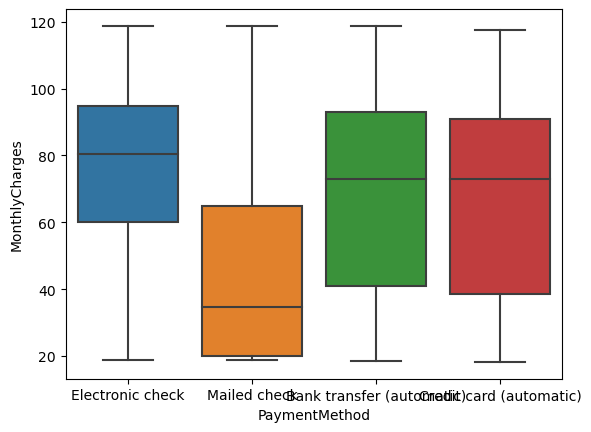

In [25]:
sns.boxplot(x= df['PaymentMethod'], y= df['MonthlyCharges'])


3. Linear Regression:
● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:
a. Divide the dataset into train and test sets in 70:30 ratio.
b. Build the model on train set and predict the values on test set
c. After predicting the values, find the root mean square error
d. Find out the error in prediction & store the result in ‘error’
e. Find the root mean square error

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [28]:
x = df.loc[:,['tenure']].values

In [29]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]], dtype=int64)

In [34]:
y = df.loc[:,['MonthlyCharges']].values
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [35]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=10)
        

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[64.49956533],
       [55.84913204],
       [73.14999862],
       ...,
       [73.74658023],
       [56.44571365],
       [69.57050899]])

In [38]:
from sklearn.metrics import mean_squared_error

In [40]:
mse = mean_squared_error(Y_test,y_pred)
mse

857.0457573707068

In [41]:
#root mean squared error
rmse = np.sqrt(mse)
rmse

29.275343847181485

In [42]:
from sklearn.metrics import *

In [43]:
r2 = r2_score(Y_test,y_pred)
r2

0.06495055317204079

4. Logistic Regression:
● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:
a. Divide the dataset in 65:35 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and get the accuracy score
-. Build a multiple logistic regression model where dependent variable
   is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
e. Divide the dataset in 80:20 ratio
f. Build the model on train set and predict the values on test set
g. Build the confusion matrix and get the accuracy score

In [44]:
x= df.loc[:,['MonthlyCharges']].values
y= df.loc[:,['Churn']].values

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=20,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [58]:
y_pred = logreg.predict(x_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [69]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [59]:
confusion_matrix(y_pred, y_test)

array([[17,  3],
       [ 0,  0]], dtype=int64)

In [60]:
accuracy_score(y_pred,y_test)

0.85

In [72]:
#B
x= df.loc[:,['MonthlyCharges','tenure']].values
y= df.loc[:,['Churn']].values

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=20,random_state=0)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [82]:
Y_pred = logreg.predict(X_test)

In [83]:
Y_pred

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [84]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(Y_pred,Y_test)

array([[16,  1],
       [ 1,  2]], dtype=int64)

In [85]:
accuracy_score(Y_test,Y_pred)

0.9

5. Decision Tree:
● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:
a. Divide the dataset in 80:20 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [86]:
x = df.loc[:,['tenure']].values
y= df.loc[:,['Churn']].values

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred = dtc.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [92]:
confusion_matrix(y_pred,y_test)

array([[965, 281],
       [ 76,  87]], dtype=int64)

In [93]:
accuracy_score(y_pred,y_test)

0.7466288147622427

6. Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:
a. Divide the dataset in 70:30 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [94]:
x = df.loc[:,['tenure','MonthlyCharges']].values
y= df.loc[:,['Churn']]

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7812\104675145.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=500)

In [100]:
y_pred = rfc.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [101]:
confusion_matrix(y_pred,y_test)

array([[1350,  324],
       [ 210,  229]], dtype=int64)

In [103]:
accuracy_score(y_pred,y_test)

0.747278750591576

In [ ]:
#Logistic regression is giving the bes accuracy